# II. Predictions in Trading: How to Build Them, How to Use Them

In the previous video, we demonstrated how to build a model for predicting price changes. The moment we have our predictions, a series of important questions arise—questions that will guide our entire trading strategy:
* How can we use these forecasts to decide how much to buy or sell?
* Should we buy when the predictions are positive, and sell when they are negative?
* Predictions can be generated in different ways—so which approach is correct?
* What exactly do our predictions represent, and how should we interpret these numbers?
* What are we ultimately trying to achieve through buying and selling, and what objective are we optimizing?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from helper_functions import get_synth_data

# Using Synthetic Data

In [2]:
xs, ys = get_synth_data(1000)

In [3]:
print(xs[:5])

[ 0.25702695  0.43277689  0.90756821  0.42787762 -0.54899807]


In [4]:
print(ys[:5])

[ 0.77307861 -0.75163789 -0.3205199   0.40651323  0.20118948]


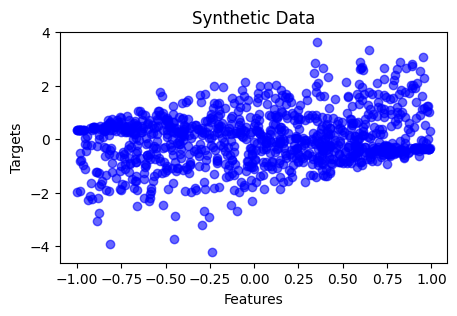

In [5]:
plt.figure(figsize=(5,3))
plt.title('Synthetic Data')
plt.xlabel('Features')
plt.ylabel('Targets')
plt.scatter(xs, ys, color = 'b', alpha = 0.6)
plt.show()

# Defining a Measure of Accuracy

In [6]:
df = pd.DataFrame({'feature':xs, 'target':ys})
df.head()

,feature,target
0,0.257027,0.773079
1,0.432777,-0.751638
2,0.907568,-0.320520
3,0.427878,0.406513
4,-0.548998,0.201189


In [7]:
k = 0.1
c = 0.03
df['prediction'] = k * df.feature + c

In [8]:
df['difference'] = df.target - df.prediction

In [9]:
df['absolute_diff'] = np.abs(df.difference)
df['squared_diff'] = np.power(df.difference, 2)

In [10]:
df.head(3)

,feature,target,prediction,difference,absolute_diff,squared_diff
0,0.257027,0.773079,0.055703,0.717376,0.717376,0.514628
1,0.432777,-0.751638,0.073278,-0.824916,0.824916,0.680486
2,0.907568,-0.320520,0.120757,-0.441277,0.441277,0.194725


In [11]:
df.absolute_diff.mean(), df.squared_diff.mean()

(0.7892213075102151, 1.0190745977113553)

# Relating Mean Absolute Difference and Mean Squared Difference

In [12]:
xs, ys = get_synth_data(100_000)

In [13]:
abs_diffs, sqr_diffs = [], []
e1_best, e2_best = None, None
for i in range(10000):

    c = np.random.uniform(-0.5, 0.5)
    k = np.random.uniform(-0.5, 0.5)
    ps = k*xs + c

    e1 = np.mean(np.abs(ps - ys))
    e2 = np.mean(np.power(ps - ys,2))
    
    abs_diffs.append(e1)
    sqr_diffs.append(e2)
    
    if e1_best == None or e1 < e1_best:
        e1_best = e1
        c1, k1 = c, k
        
    if e2_best == None or e2 < e2_best:
        e2_best = e2
        c2, k2 = c, k

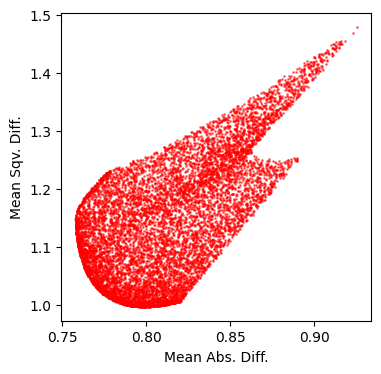

In [14]:
plt.figure(figsize=(4,4))
plt.xlabel('Mean Abs. Diff.')
plt.ylabel('Mean Sqv. Diff.')
plt.scatter(abs_diffs, sqr_diffs, color = 'r', alpha = 0.5, s = 1)
plt.show()

In [15]:
c1, k1

(-0.003255803458029005, -0.3375140454268042)

In [16]:
c2,k2

(-0.004928754007563985, 0.33471392492090246)

# Visualizing Predictions of Different Types

In [17]:
rng = np.random.default_rng(); idx = rng.choice(len(xs), size=10000, replace=False)

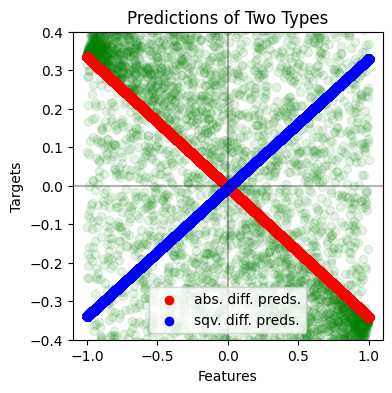

In [18]:
plt.figure(figsize=(4,4))
plt.ylim([-0.4, 0.4])
plt.xlabel('Features')
plt.ylabel('Targets')
plt.title('Predictions of Two Types')
plt.scatter(xs[idx], ys[idx], color = 'g', alpha = 0.1)
plt.scatter(xs, c1 + k1*xs, color = 'r', label = 'abs. diff. preds.')
plt.scatter(xs, c2 + k2*xs, color = 'b', label = 'sqv. diff. preds.')
plt.axhline(y = 0, color = 'k', alpha = 0.3)
plt.axvline(x = 0, color = 'k', alpha = 0.3)
plt.legend(); plt.show()

## Probability Density Distributions

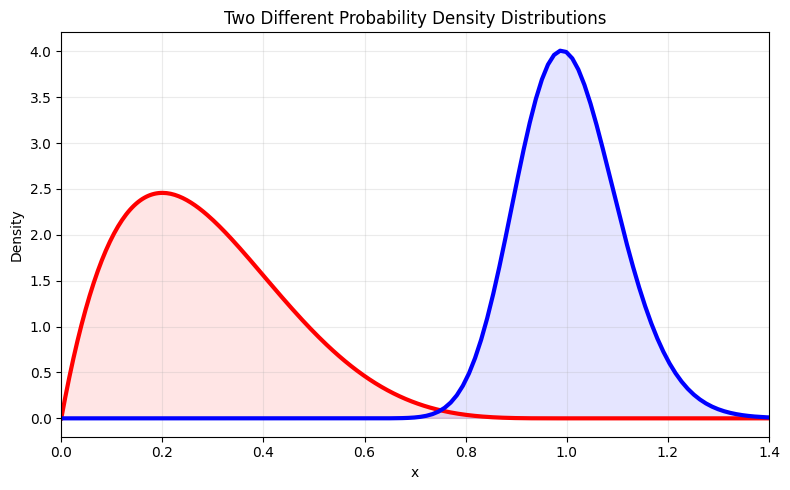

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, lognorm

a, b = 2, 5
x_beta = np.linspace(0, 2, 500)
pdf_beta = beta.pdf(x_beta, a, b)

mu, sigma = 0.0, 0.1
s = sigma
scale = np.exp(mu)
x_logn = np.linspace(0.001, 6, 500)
pdf_logn = lognorm.pdf(x_logn, s=s, scale=scale)

# Plot both distributions in one figure
plt.figure(figsize=(8, 5))
plt.xlim([0.0, 1.4])
plt.plot(x_beta, pdf_beta, linewidth=3, color = 'r')
plt.plot(x_logn, pdf_logn, linewidth=3, color = 'b')

plt.fill_between(x_beta, pdf_beta, color="r", alpha=0.1)
plt.fill_between(x_logn, pdf_logn, color="b", alpha=0.1)

plt.title("Two Different Probability Density Distributions")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

# Numeric Experiment

Let us define an arbitrary random number generator.

In [49]:
def get_sample(size):
    y1 = np.random.uniform(-1.0, 3.0, size = size)
    y2 = np.random.normal(size = size)
    h1 = y1 + 0.7*y2 
    h2 = y2 - y1
    return h1*h2

We will scan across the range of generated random numbers, and for each value in this range, calculate the mean absolute deviation and the mean squared deviation from all numbers in the sample.

In [67]:
ys = get_sample(10000)
mn, mx = np.min(ys), np.max(ys)
xs = np.linspace(mn, mx, 1000)
abs_diffs, sqv_diffs = [], []
for x in xs:
    abs_diff = np.mean(np.abs(ys - x))
    sqv_diff = np.mean(np.power(ys - x, 2))
    abs_diffs.append(abs_diff)
    sqv_diffs.append(sqv_diff)
abs_diffs = np.array(abs_diffs)
sqv_diffs = np.array(sqv_diffs)

We will plot the mean absolute deviation and mean squared deviation as functions of the chosen values, and indicate the mean and median of the distribution with two vertical lines.

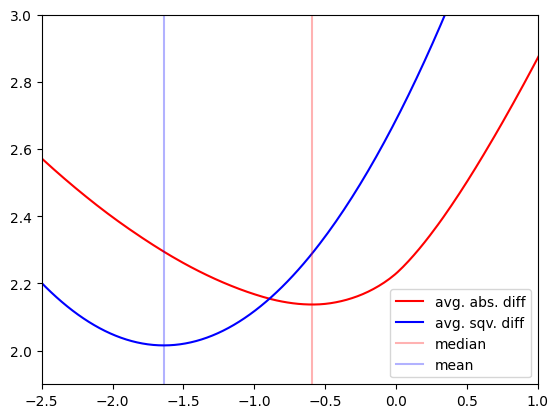

In [88]:
plt.xlim([-2.5, 1.0])
plt.ylim([1.9, 3.0])
plt.plot(xs, abs_diffs, color = 'r', label = 'avg. abs. diff')
plt.plot(xs, sqv_diffs/4, color = 'b', label = 'avg. sqv. diff')
plt.axvline(x = np.median(ys), color = 'r', alpha = 0.3, label = 'median')
plt.axvline(x = np.mean(ys), color = 'b', alpha = 0.3, label = 'mean')
plt.legend()
plt.show()